## 物态方程插值

In [1]:
from scipy.interpolate import interp2d
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import interpolate

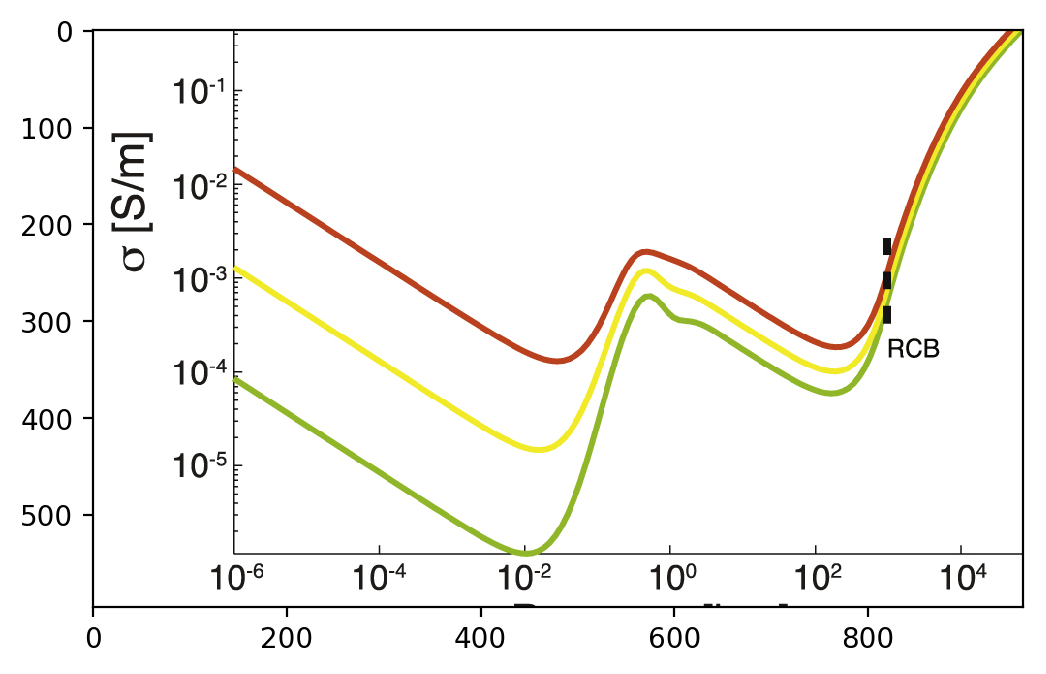

In [174]:
lena = mpimg.imread('interpolation.jpg')
lena=lena[875:1470,:960,]
plt.figure(dpi=200)
plt.imshow(lena)
#plt.axis('off')
plt.show()

In [169]:
P=np.array([447,464,470,474,477,480,483,488,494,500,505,507,512,520,528,534,540,546,556,566,575,587,600,612,624])
ln_sigma=np.array([1414,1407,1401,1396,1393,1388,1384,1378,1367,1352,1338,1332,1317,1290,1262,1243,1220,1198,1171,1154,1149,1156,1168,1174,1176])
P_1=np.array([634,655,678,700,720,740,756,763,769,776,787,800,805,810,815,820,825,830,840,846,850,860,870,875,880,890,900,910,918,930,945,960])
ln_sigma_1=np.array([1179,1193,1208,1219,1232,1243,1247,1246,1245,1244,1237,1220,1204,1194,1180,1172,1150,1127,1097,1075,1064,1040,1012,1000,990,970,952,935,925,909,892,875])
len(P_1)==len(ln_sigma_1)

True

In [173]:
P=np.array([P,P_1])
ln_sigma=np.array([ln_sigma,ln_sigma_1])
len(P)==len(ln_sigma)

True

In [ ]:
P=np.array([-6+(P[i]-145)/149 for i in range(len(P))])
ln_sigma=np.array([])

In [ ]:
#原点坐标
(675,145),(1414,145)
#1e2Pa
delta1=149
#10S/m
delta2=100
#500K
delta3=61

In [1]:


x = np.linspace(0, 4, 13)
y = np.array([0, 2, 3, 3.5, 3.75, 3.875, 3.9375, 4])
X, Y = np.meshgrid(x, y)
Z = np.sin(np.pi*X**2/2) * np.exp(Y/4)

x2 = np.linspace(0, 4, 100)
y2 = np.linspace(0, 4, 100)
f = interp2d(x, y, Z, kind='cubic')
Z2 = f(x2, y2)

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].pcolormesh(X, Y, Z)

X2, Y2 = np.meshgrid(x2, y2)
ax[1].pcolormesh(X2, Y2, Z2)

plt.show()

In [43]:
Pa=np.array([1e-5,1e-4,1e-3,5e-3,1e-2,3e-2,7e-2,1e-1,1,1e1,1e2,7e2,1e3,7e3,1e4,7e4,1e5,1.15e5])
Ta=np.array([1e3,1e3,1e3,1e3,1e3,1.06e3,1.1e3,1.28e3,1.57e3,1.66e3,1.67e3,1.68e3,1.7e3,2.7e3,3e3,4.4e3,5.54e3,6.5e3])
Pa=np.log10(Pa)
Ta=np.log10(Ta)
len(Pa)==len(Ta)

True

In [56]:

f=interpolate.splrep(Pa,Ta,s=0)
P=np.linspace(-5,5.06,200)
T=interpolate.splev(P,f,der=0)

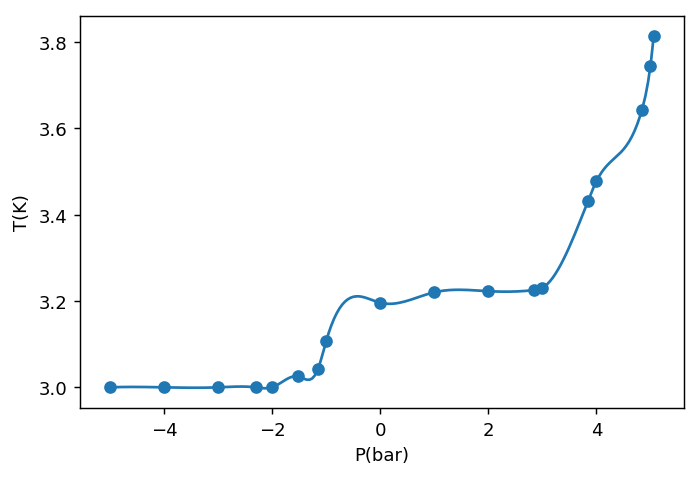

In [57]:
P=np.linspace(-5,5.06,200)
plt.figure(dpi=130)
plt.plot(P,T)
plt.scatter(Pa,Ta)
plt.xlabel('P(bar)')
plt.ylabel('T(K)')
plt.show()

In [35]:
Ta

array([3.        , 3.        , 3.        , 3.        , 3.        ,
       3.02530587, 3.04139269, 3.10720997, 3.19589965, 3.22010809,
       3.22271647, 3.22530928, 3.30535137, 3.43136376, 3.5563025 ,
       3.64345268, 3.74350976, 3.81291336])

In [58]:
sigma=0.75*T-0.5*P-4.35*11594/10**(T)
sigma1=0.75*Ta-0.5*Pa-4.35*11594/10**(Ta)

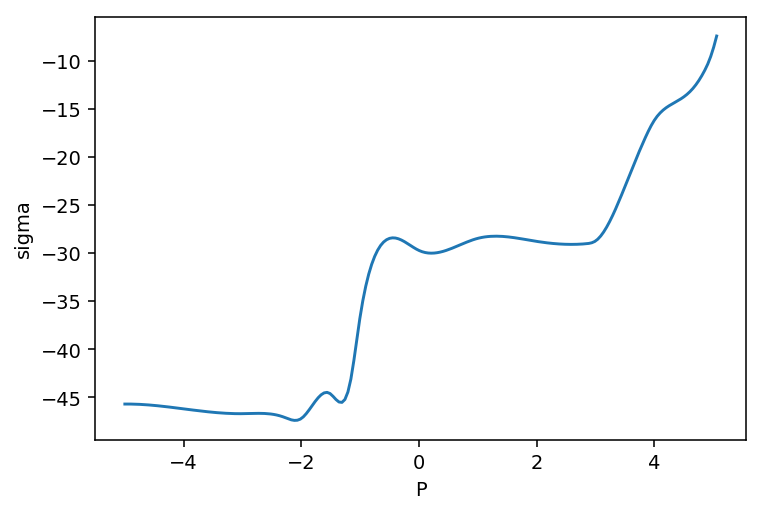

In [60]:
plt.figure(dpi=140)
plt.plot(P,sigma)
plt.xlabel('P')
plt.ylabel('sigma')
plt.show()

In [29]:
help(np.log2)

Help on ufunc object:

log2 = class ufunc(builtins.object)
 |  Functions that operate element by element on whole arrays.
 |  
 |  To see the documentation for a specific ufunc, use `info`.  For
 |  example, ``np.info(np.sin)``.  Because ufuncs are written in C
 |  (for speed) and linked into Python with NumPy's ufunc facility,
 |  Python's help() function finds this page whenever help() is called
 |  on a ufunc.
 |  
 |  A detailed explanation of ufuncs can be found in the docs for :ref:`ufuncs`.
 |  
 |  Calling ufuncs:
 |  ===============
 |  
 |  op(*x[, out], where=True, **kwargs)
 |  Apply `op` to the arguments `*x` elementwise, broadcasting the arguments.
 |  
 |  The broadcasting rules are:
 |  
 |  * Dimensions of length 1 may be prepended to either array.
 |  * Arrays may be repeated along dimensions of length 1.
 |  
 |  Parameters
 |  ----------
 |  *x : array_like
 |      Input arrays.
 |  out : ndarray, None, or tuple of ndarray and None, optional
 |      Alternate array 

In [11]:
T=np.linspace(2,4,20)
p=np.linspace(8,9,20)
R=f(p,T)

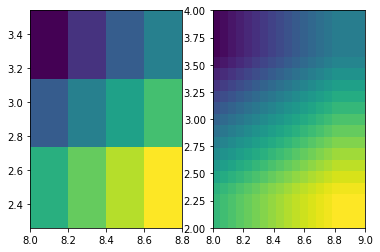

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].pcolormesh(P_1, T_1, rho)

X2, Y2 = np.meshgrid(p, T)
ax[1].pcolormesh(p,T,R)

plt.show()